In [1]:
# Load data
import pandas as pd
from datetime import timedelta
import io
from google.colab import files
# Manipulation and visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import itertools
import matplotlib.colors as mcolors
from google.colab import files

In [2]:
uploaded = files.upload()

Saving p1e_strain_gauges_series.csv to p1e_strain_gauges_series.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['p1e_strain_gauges_series.csv']), index_col='date',
                 parse_dates=True)

df

,Vault_temp,Strain_Gauge_7,Strain_Gauge_8,Strain_Gauge_9,p1ex,p1ey
date,,,,,,
2022-06-23,23.128864,16679.24451,91485.18677,81835.73235,-0.778798,0.014580
2022-06-24,23.090462,16589.88760,91380.46240,81735.58585,-0.779237,0.013867
2022-06-25,23.228061,16711.32749,91513.45588,81854.29846,-0.779628,0.013177
2022-06-26,23.023927,16690.77627,91480.39526,81829.19720,-0.779980,0.012552
2022-06-27,22.848720,16625.85517,91431.34026,81781.06493,-0.780296,0.011990
...,...,...,...,...,...,...
2023-11-30,22.206048,16389.06416,92740.11353,81475.87731,-1.179686,-0.093052
2023-12-01,22.266127,16383.75138,92718.49958,81438.61198,-1.181063,-0.084236
2023-12-02,22.101410,16368.73515,92671.77742,81400.59298,-1.191564,-0.075369


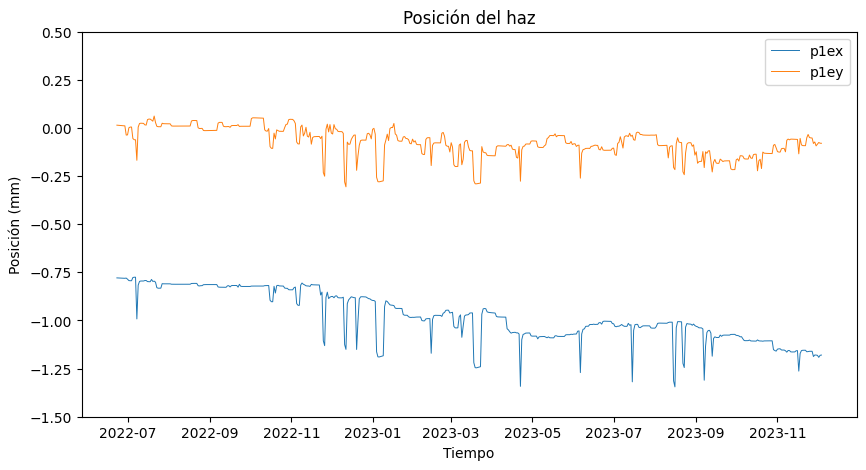

In [ ]:
# to set the plot size

plt.figure(figsize=(10, 5))


plt.plot(df['p1ex'], label='p1ex', linewidth=0.7)
plt.plot(df['p1ey'], label='p1ey', linewidth=0.7)

# adding title to the plot
plt.title('Posición del haz')

# adding Label to the x-axis
plt.xlabel('Tiempo')
plt.ylabel('Posición (mm)')

plt.ylim(-1.5, 0.5)

# adding legend to the curve
plt.legend()


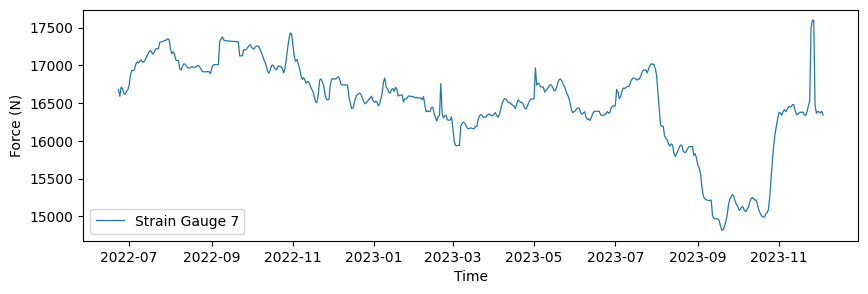

In [ ]:
# to set the plot size

plt.figure(figsize=(10, 3))


plt.plot(df['Strain_Gauge_7'], label='Strain Gauge 7', linewidth=0.9)

# adding Label to the x-axis
plt.xlabel('Time')
plt.ylabel('Force (N)')

# adding legend to the curve
plt.legend()

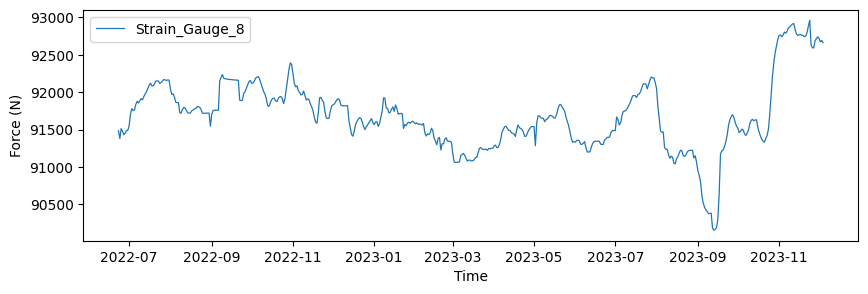

In [ ]:
# to set the plot size

plt.figure(figsize=(10, 3))


plt.plot(df['Strain_Gauge_8'], label='Strain_Gauge_8', linewidth=0.9)


# adding Label to the x-axis
plt.xlabel('Time')
plt.ylabel('Force (N)')


# adding legend to the curve
plt.legend()

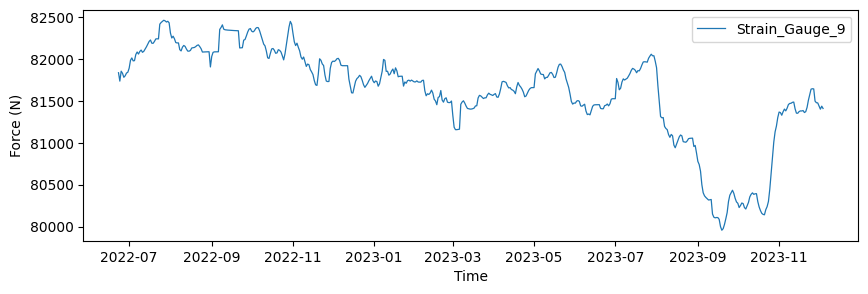

In [ ]:
# to set the plot size

plt.figure(figsize=(10, 3))


plt.plot(df['Strain_Gauge_9'], label='Strain_Gauge_9', linewidth=0.9)


# adding Label to the x-axis
plt.xlabel('Time')
plt.ylabel('Force (N)')


# adding legend to the curve
plt.legend()

In [ ]:
#Probando estacionaridad con el estadistico ADF
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(df['p1ey'])
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')
print(f'critical values: {ADF_result[4]}')

ADF Statistic: -2.1168628888595116
p-value: 0.2377882320520726
critical values: {'1%': -3.4431115411022146, '5%': -2.8671684899522023, '10%': -2.5697677754736543}


Vamos a calcular las cross correlations

In [ ]:
from scipy import signal
def ccf_values(series1, series2):
    x = (series1)
    y = (series2)
    x = (x - np.mean(x)) / (np.std(x) * len(x))
    y = (y - np.mean(y)) / (np.std(y))
    c = np.correlate(x, y, 'full')
    return c

ccf_p1e = ccf_values(df['Strain_Gauge_7'], df['p1ex'])


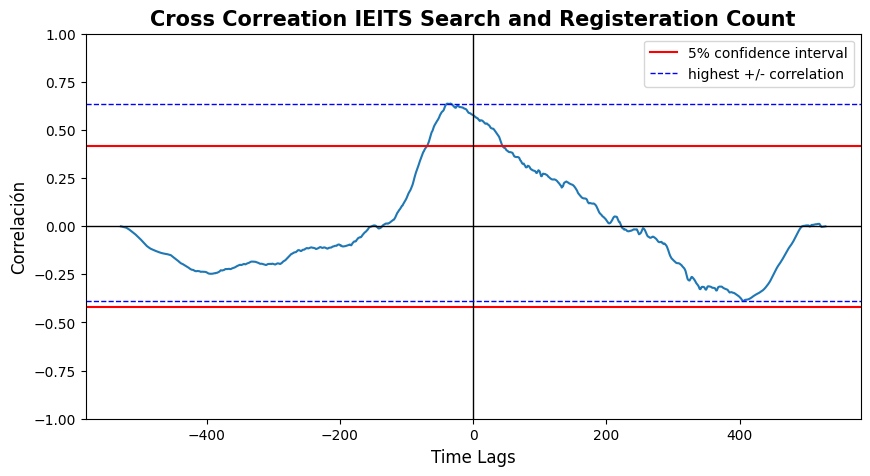

In [ ]:
lags = signal.correlation_lags(len(df['Strain_Gauge_7']), len(df['p1ex']))

def ccf_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(10, 5))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1,
    linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1,
    linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation IElTS Search and Registeration Count', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlación',fontsize = 12)
    ax.set_xlabel('Time Lags', fontsize = 12)
    #ax.set(xlim = [-200, 0])
    plt.legend()

ccf_plot(lags, ccf_p1e)

In [21]:
# Calculo de la correlacion
from scipy.stats import pearsonr
varx =df['Strain_Gauge_9']
vary =df['p1ey']
corr = pearsonr(varx, vary)
#r = np.corrcoef(varx, vary)
corr


PearsonRResult(statistic=0.6799901649550626, pvalue=3.55684110494647e-73)

coefficient of determination: 0.4623866244356132
intercept: -7.327648125681618
slope: 8.890436803238316e-05


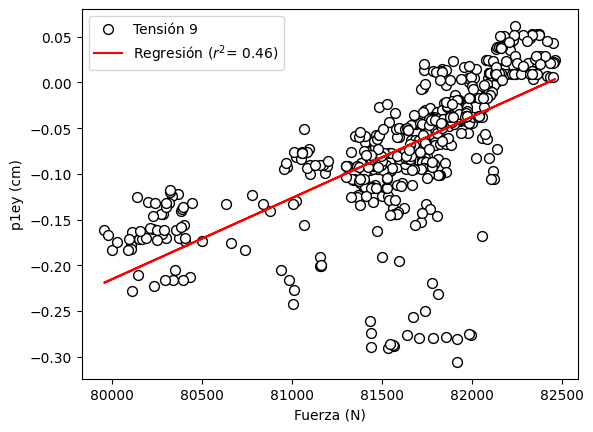

In [23]:
# Graficamos la temperatura del vault
x = varx.to_numpy().reshape(-1, 1)
y = vary.to_numpy()


import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_[0]}")

plt.scatter(x, y, c = "white",edgecolors = "black",s=50, label='Tensión 9')
plt.plot(x, model.predict(x), color='red', label=r"Regresión $(r^2 $= $ 0.46)$")
plt.xlabel("Fuerza (N)")
plt.ylabel("p1ey (cm)")
#plt.xlim([0, 25])
#plt.ylim([79000, 84000])
plt.legend()
plt.show()


1.   Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.

2.   const coefficient is your Y-intercept. It means that if both the interest_rate and unemployment_rate coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.

3. std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy

4. P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant

5. Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

## fit a OLS model with intercept on TV and Radio
#X = varx
#X = df[['Strain_Gauge_7', 'Strain_Gauge_9']]
#y = df['p1ex']
#X = sm.add_constant(X)
#est = sm.OLS(y, X).fit()
#print(est.summary())


# formula: response ~ predictor + predictor
est = smf.ols(formula='Strain_Gauge_7 ~  Vault_temp', data=df).fit()
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:         Strain_Gauge_7   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     821.9
Date:                Thu, 22 Feb 2024   Prob (F-statistic):          1.05e-109
Time:                        19:40:44   Log-Likelihood:                -3883.5
No. Observations:                 530   AIC:                             7771.
Df Residuals:                     528   BIC:                             7780.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9962.7965    228.439     43.613      0.0

In [ ]:
# Residual standard error RSE
X = df[['Vault_temp']]
y = df['Strain_Gauge_8']
model = sm.OLS(y, X).fit()
model.resid.std(ddof=X.shape[1])

6175.961431997875

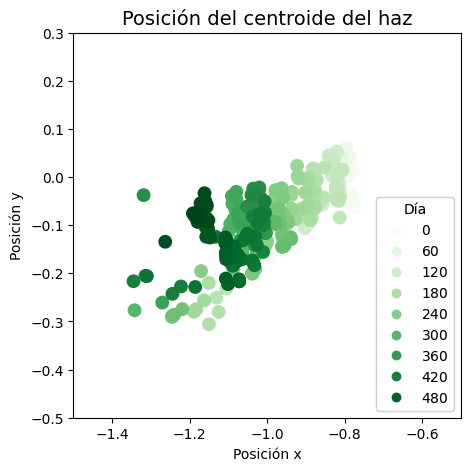

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x = df['p1ex']
y = df['p1ey']

z = np.arange(len(df))

fig, ax = plt.subplots( figsize = (5,5))

scatter = ax.scatter(x, y, c = z , cmap = 'Greens' , s = 80)
legend = ax.legend(*scatter.legend_elements(), loc="lower right",
                   title="Día")
ax.add_artist(legend)
ax.set_xlabel('Posición x')
ax.set_ylabel('Posición y')
ax.set_title('Posición del centroide del haz', size = 14)
plt.xlim([-1.5, -0.5])
plt.ylim([-0.5, 0.3])
plt.show()

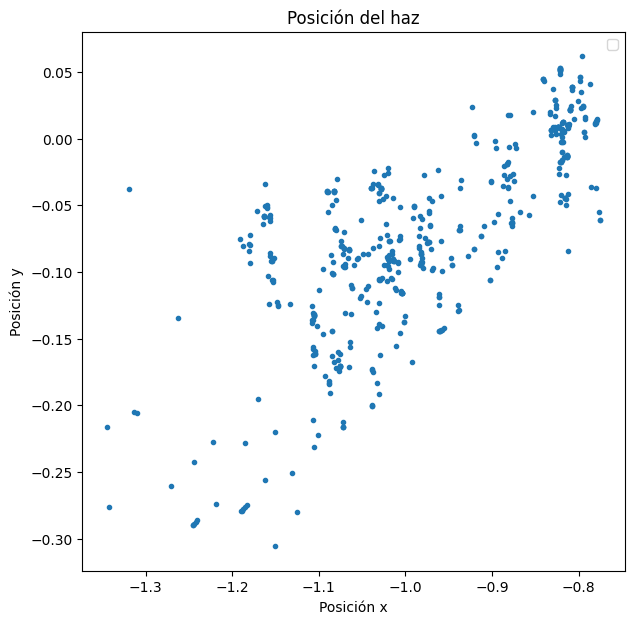

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()  # for plot styling
import numpy as np

plt.figure(figsize=(7, 7))
plt.scatter(df['p1ex'], df['p1ey'], marker='.')
# adding title to the plot
plt.title('Posición del haz')

# adding Label to the x-axis
plt.xlabel('Posición x')

# adding Label to the y-axis
plt.ylabel('Posición y')

# adding legend to the curve
plt.legend()
plt.show()

In [ ]:
# importing libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(
    x=df['p1ex'],
    y=df['p1ey'],
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color=z,                # set color to an array/list of desired values
        colorscale='viridis',   # choose a colorscale
        opacity=0.8,
        colorbar=dict(thickness=15)
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

# Add a color bar which maps values to colors.

fig.show()